# AIFFEL 대전 1기 Going Deeper CV Lecture 2. imgaug 라이브러리
## Date: APRIL 08, 2021

# 1. imgaug
## imgaug 라이브러리 사용하기
***
![imgaug](https://aiffelstaticprd.blob.core.windows.net/media/images/GC-2-L-11.max-800x600.png)  

- [imgaug 라이브러리](https://github.com/aleju/imgaug)  
- [Overview of imgaug](https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html)  

### 1. imgaug 라이브러리란?
- 이미지 augmentation을 할 수 있게 하는 기능들이 있는 라이브러리  

*설치: $ pip install -q imgaug*  

### 2. imgaug 기본 사용 방법
- 배열을 이미지의 기본 형태로 사용.  
- PIL Image 데이터형을 넘파이(numpy) 배열로 변환해 사용.

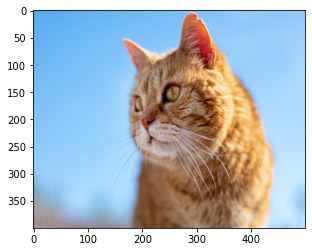

In [1]:
import numpy as np
import imgaug.augmenters as iaa
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.

image_arr = np.array(image)
plt.imshow(image_arr)

### 3. imgaug 라이브러리를 이용해 augmentation 해보기
**1) Affine변환: 2D 변환의 일종인 아핀 변환은 이미지의 스케일(scale)을 조절하거나 평행이동, 또는 회전 등의 변화를 줄 수 있다.**  
- 참고 자료: [2D 변환(Transformations)](https://darkpgmr.tistory.com/79)  

*아래 코드를 실행하면 -25도와 25도 사이에 랜덤하게 각도를 변화하는 augmentation을 볼 수 있다.*

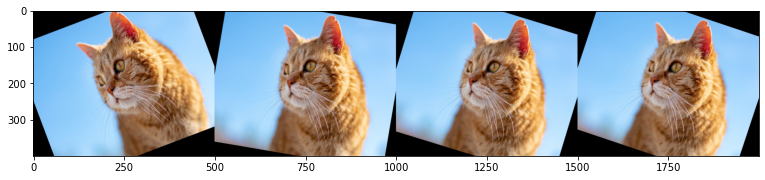

In [2]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

**2) Crop: 이미지를 잘라내는 기법으로 잘라내려는 원본 이미지의 비율을 매개변수로 이용.**

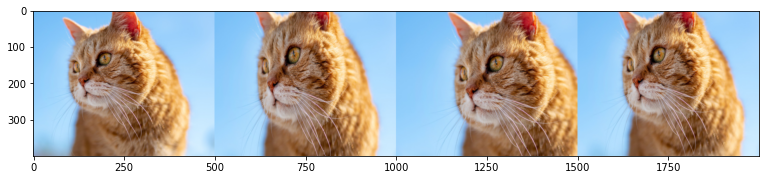

In [3]:
# 비율이 0.2일 때
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

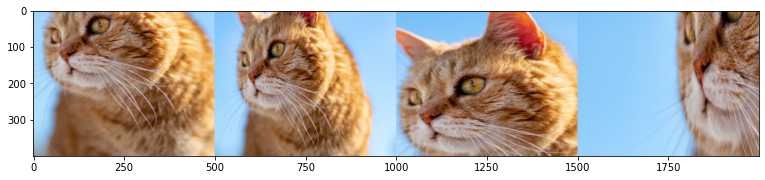

In [5]:
# 비율이 0.5일 때
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.5))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

**3) Sequential: augmentation 기법 여러 개를 순차적으로 실행**  
*아래 코드는 rotate와 crop이 순차적으로 적용된 결과*  

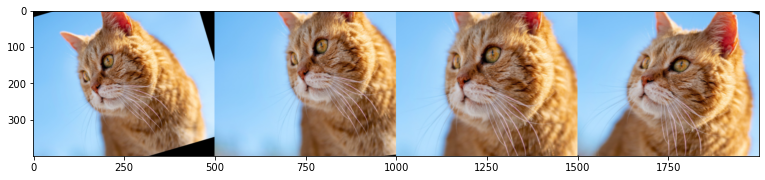

In [6]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

**순차적으로 실행이 아닌 랜덤한 순서로 augmentation을 실행하고 싶다면 random_order=True를 추가**

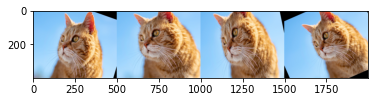

In [7]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True) #  random_order=True 추가
images_aug = rotate_crop(images=images)
plt.imshow(np.hstack(images_aug))

**4) Oneof: Sequential은 순차적으로 전부 실행하는 것이라면, Oneof은 여러 aug기법 중 하나만 선택해 실행하는 것**  
*아래 코드를 실행하면 gray scale 또는 saturation 중 하나만 적용된다*

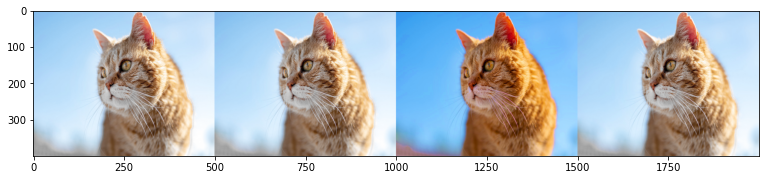

In [8]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

**5) Sometimes: Oneof은 랜덤하게 여러 기법 중 하나를 택하는 것이지만 Sometimes는 기법 별로 확률을 정해서 작성자가 지정한 확률 기반으로 aug기법이 선택되 적용된다.**  
*아래 코드는 `iaa.AddToSaturation`을 0.6 확률, `iaa.Grayscale`를 0.2 확률로 적용*

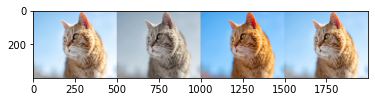

In [9]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
iaa.Sometimes(
  0.6,
  iaa.AddToSaturation((-50,50))
  ),
iaa.Sometimes(
  0.2,
  iaa.Grayscale((0.0,1.0))
)
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))

### 실습: iaa.Sequntial()과 iaa.OneOf(), iaa.Sometimes() 등을 이용해 다양한 augmentation 시각화(100장)

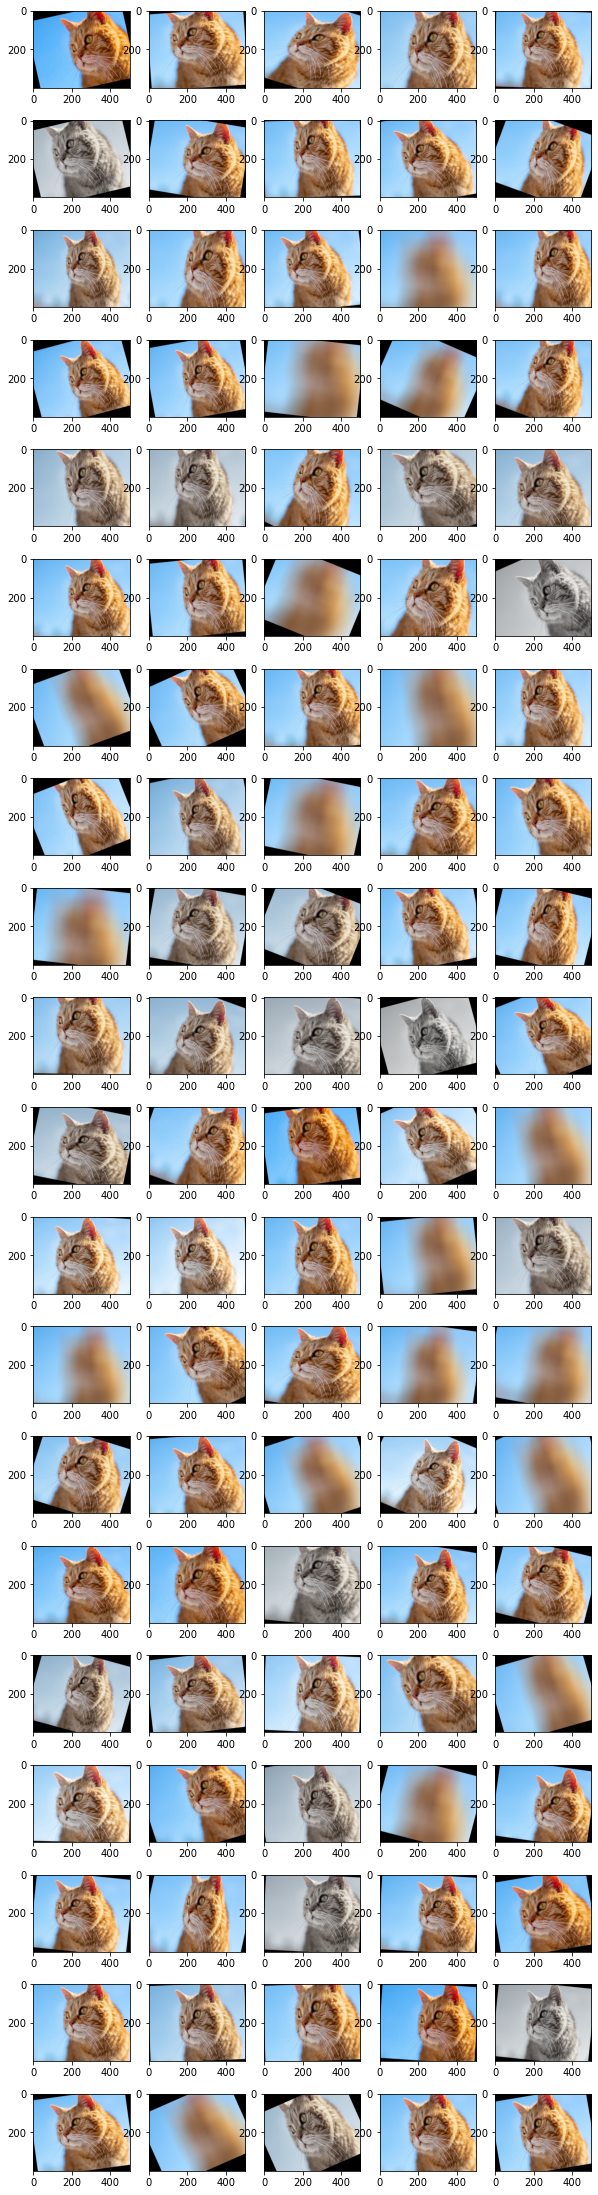

In [11]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.

seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         ),
           iaa.Sometimes(
             0.5,
           iaa.AverageBlur(k=100)
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))

num = 100

for i in range(num):
    images = [image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,5,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()

***

# 2. 텐서플로를 사용한 Image augmentation
1) PIL 라이브러리로 이미지 불러오기 & resize: image = Image.open(이미지 경로).resize((width,height))  
2) img -> array 변환: image_tensor = tf.keras.preprocessing.image.img_to_array(image)  
3) augmentation적용: random_cropped_tensor = tf.image.random_crop(image_tensor, size=[100,100,3])  
4) array -> img 변환: random_cropped = tf.keras.preprocessing.image.array_to_img(random_cropped_tensor)  
5) Display: plt.imshow(random_cropped)  

*위 순서를 따라 random crop 진행한 코드 아래 있음*

## 1) random crop

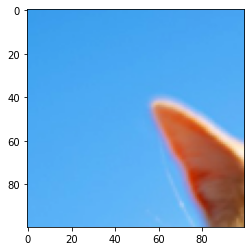

In [12]:
# apply random_crop on cat image
# 여기에 코드를 입력해 주세요.

image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

random_cropped_tensor = tf.image.random_crop(
    image_tensor, size=[100,100,3],
  #seed=2021, name='cropped 0.5'
)

random_cropped = tf.keras.preprocessing.image.array_to_img(random_cropped_tensor)

plt.imshow(random_cropped)

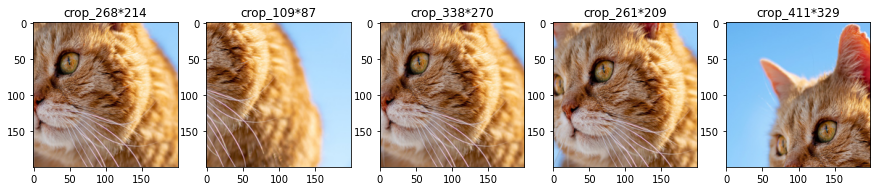

In [13]:
# 5장 random_crop

# display 5 random cropped images
# 여기에 코드를 입력해 주세요.

def random_cropped(sample_img_path, num_img=5):
    image = Image.open(sample_img_path).resize((500, 400))
    image_tensor = tf.keras.preprocessing.image.img_to_array(image)
    
    plt.figure(figsize=(15,15))
    
    from random import uniform
    
    for i in range(num_img):
        random_ratio_h = uniform(0,1)
        random_ratio_w = uniform(0,1)
        
        random_cropped_tensor = tf.image.random_crop(image_tensor, size=[200,200,3])
        random_cropped = tf.keras.preprocessing.image.array_to_img(random_cropped_tensor)

        plt.subplot(1,num_img,i+1)
        plt.imshow(random_cropped)
        plt.title('crop_{}*{}'.format(int(500*random_ratio_h),int(400*random_ratio_h)))
        
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
random_cropped(sample_img_path)

## 2) random_brightness
`tf.image.random_brightness()`만 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과하게 될 수도 있습니다. 이 경우 `plt.imshow()`에서 rescale되어 밝기 변경 효과가 상쇄되어 보일 수도 있습니다. 따라서 `tf.image.random_brightness()` 다음에는 **`tf.clip_by_value()`**를 적용해 주는 것을 잊지 마세요.   

- tf.clip_by_value(t, clip_value_min, clip_value_max, name=None)  
\>> **입력 텐서 t를 clip_value_min ~ clip_value_max 사이값으로 변환.**  

### tf.clip_by_value를 적용하지 않는다면 range를 벗어나는 에러가 발생.

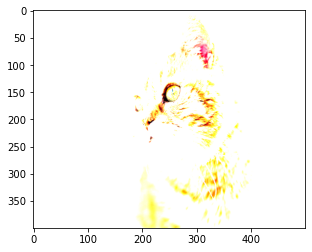

In [16]:
# apply random_brightness on cat image
# 여기에 코드를 입력해 주세요.
sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
image = Image.open(sample_img_path).resize((500, 400))
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

random_brightness_tensor = tf.image.random_brightness(
    image_tensor, max_delta=235, seed=2021
)

# tf.clip_by_value를 해줘야 한다. (tf.image.random_brightness()만 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과할 수 있다.)
random_bright_tensor = tf.clip_by_value(random_brightness_tensor, 0, 255)

random_brightness = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_brightness)

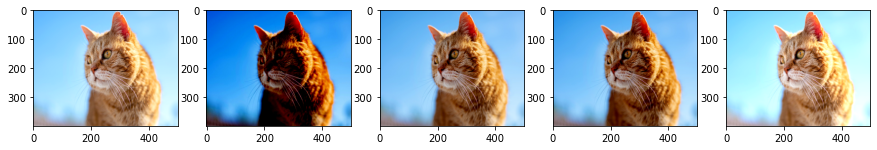

In [19]:
# 5장 랜덤하게 밝기 조절

# display 5 random brightness images
# 여기에 코드를 입력해 주세요.

def random_brightness(sample_img_path, num_img=5):
  
    import tensorflow as tf
    from PIL import Image
    import matplotlib.pyplot as plt


    image = Image.open(sample_img_path).resize((500,400))
    image_tensor = tf.keras.preprocessing.image.img_to_array(image)


    plt.figure(figsize=(15,15))

    for i in range(num_img):

        random_brightenss_tensor = tf.image.random_brightness(image_tensor, max_delta=200, seed=2021)
        random_bright_tensor = tf.clip_by_value(random_brightenss_tensor, 0, 255)
        random_brightness = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

        plt.subplot(1,num_img,i+1)
        plt.imshow(random_brightness)

import os
sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
random_brightness(sample_img_path)